In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00


In [ ]:
import os
from datasets import load_dataset
from PIL import Image

# Load the dataset
ds = load_dataset("Falah/Alzheimer_MRI")

# Create directories for train and test if they don't exist
os.makedirs('train', exist_ok=True)
os.makedirs('test', exist_ok=True)

# Function to save images
def save_images(split, split_name):
    for i, example in enumerate(split):
        # Get the image and label
        image = example["image"]
        label = example["label"]
        if label == 0:
            label = 'Mild_Demented'
        elif label == 1:
            label = 'Moderate_Demented'
        elif label == 2:
            label = 'Non_Demented'
        elif label == 3:
            label = 'Very_Mild_Demented'
        else:
            label = 'Incorrect_img'

        # Create a folder for each label (if you want to categorize them by label)
        label_dir = os.path.join(split_name, str(label))
        os.makedirs(label_dir, exist_ok=True)

        # Save the image
        image_path = os.path.join(label_dir, f"{split_name}_{i}.jpg")
        image.save(image_path)

        if i % 100 == 0:  # Print progress for every 100 images
            print(f"Saved {i} images to {split_name}/{label}")

# Save the train split images
save_images(ds["train"], "train")

# Save the test split images
save_images(ds["test"], "test")

print("Dataset has been moved to the 'train' and 'test' directories.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

(…)-00000-of-00001-c08a401c53fe5312.parquet:   0%|          | 0.00/22.6M [00:00<?, ?B/s]

(…)-00000-of-00001-44110b9df98c5585.parquet:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

Saved 0 images to train/Non_Demented
Saved 100 images to train/Mild_Demented
Saved 200 images to train/Mild_Demented
Saved 300 images to train/Non_Demented
Saved 400 images to train/Non_Demented
Saved 500 images to train/Very_Mild_Demented
Saved 600 images to train/Non_Demented
Saved 700 images to train/Non_Demented
Saved 800 images to train/Mild_Demented
Saved 900 images to train/Non_Demented
Saved 1000 images to train/Non_Demented
Saved 1100 images to train/Mild_Demented
Saved 1200 images to train/Very_Mild_Demented
Saved 1300 images to train/Non_Demented
Saved 1400 images to train/Very_Mild_Demented
Saved 1500 images to train/Non_Demented
Saved 1600 images to train/Non_Demented
Saved 1700 images to train/Very_Mild_Demented
Saved 1800 images to train/Non_Demented
Saved 1900 images to train/Non_Demented
Saved 2000 images to train/Non_Demented
Saved 2100 images to train/Mild_Demented
Saved 2200 images to train/Non_Demented
Saved 2300 images to train/Very_Mild_Demented
Saved 2400 images

In [ ]:
import pandas as pd
import numpy as np
import os
from distutils.dir_util import copy_tree, remove_tree
import cv2
import matplotlib.pyplot as plt
import warnings

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow import keras
from random import randint

In [ ]:
import os
from distutils.dir_util import copy_tree, remove_tree # Import remove_tree

default_dir = "./"
root_dir = "./"
#test_dir = default_dir + "test/"
train_dir = default_dir + "train/"
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
    remove_tree(work_dir)


os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
#copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented', 'Mild_Demented']


In [ ]:
CLASSES = [ 'Mild_Demented',
            'Moderate_Demented',
            'Non_Demented',
            'Very_Mild_Demented']

IMG_SIZE = 176

IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

In [ ]:
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

image_generator = ImageDataGenerator(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM,
                                     data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

In [ ]:
train_dataset = image_generator.flow_from_directory(batch_size=5200,
                                                    directory=work_dir,
                                                    target_size=(176, 176),
                                                    shuffle= True)

Found 5120 images belonging to 4 classes.


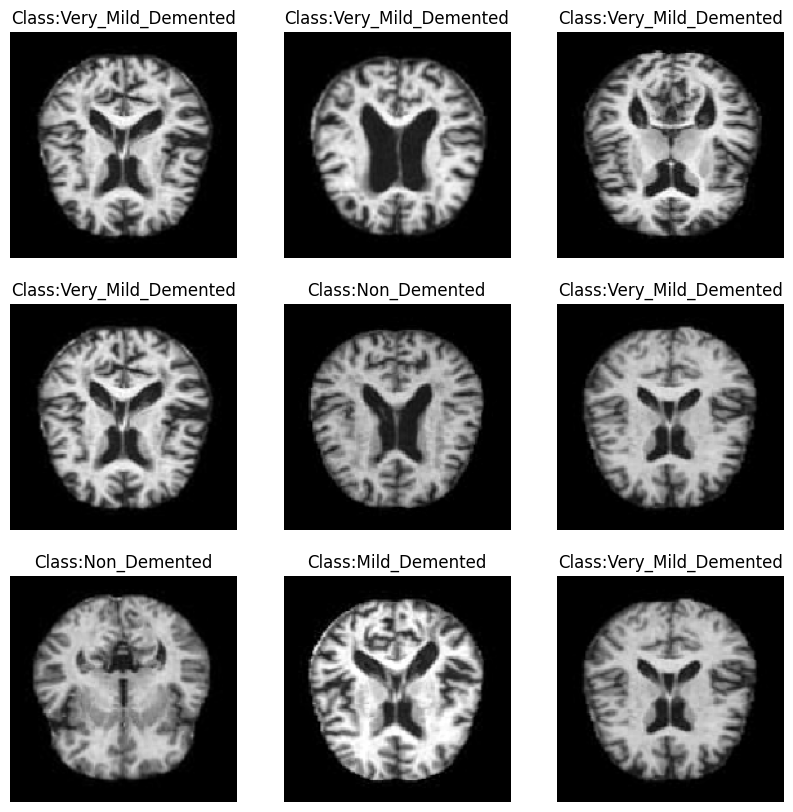

In [ ]:
def show_images(generator,y_pred=None):
    #Import matplotlib.pyplot
    import matplotlib.pyplot as plt
    # Import numpy
    import numpy as np # Added import statement

    labels =dict(zip([0,1,2,3], CLASSES))

    # get a lot of images
    x,y = next(generator) # Change here: Use next(generator) instead of generator.next()

    # show a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0,50)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))

    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))

# Display Train Images
show_images(train_dataset)


<BarContainer object of 4 artists>

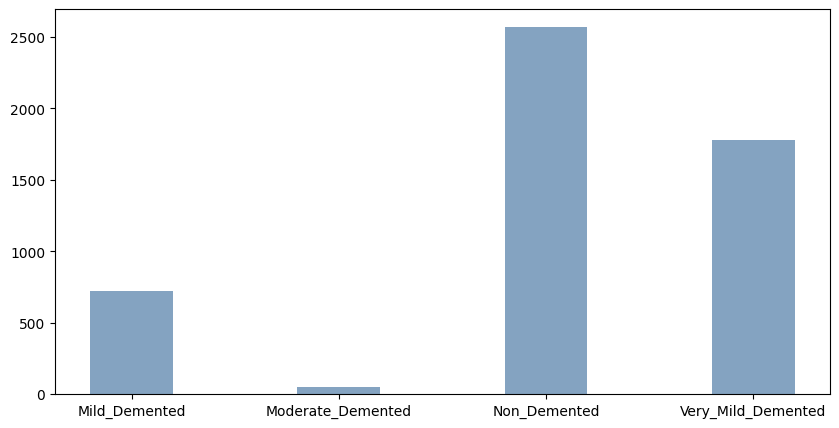

In [ ]:
import pandas as pd
import numpy as np
import os
from distutils.dir_util import copy_tree, remove_tree
import cv2
#Import matplotlib.pyplot
import matplotlib.pyplot as plt # Added import statement here
import warnings
data = {'Mild_Demented':      0,
        'Moderate_Demented': 0,
        'Non_Demented':     0,
        'Very_Mild_Demented': 0}

# visualizing dataset
for cls in os.listdir(work_dir):
    for img in os.listdir(work_dir + '/' + cls):
        data[cls] = data[cls] + 1

keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color=(0.2, 0.4, 0.6, 0.6), width = 0.4)

In [ ]:
train_data, train_labels = next(train_dataset) # Use next(train_dataset) instead of train_dataset.next()

In [ ]:
print(train_data.shape, train_labels.shape)

(5120, 176, 176, 3) (5120, 4)


In [ ]:
#resampling data

sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print(train_data.shape, train_labels.shape)

(10264, 176, 176, 3) (10264, 4)


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [ ]:
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [176,176,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(4, activation ='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=[tf.keras.metrics.CategoricalAccuracy(name='acc'),
                 keras.metrics.AUC(name='auc')]
    )

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=70)

Epoch 1/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - acc: 0.2697 - auc: 0.5256 - loss: 1.8610 - val_acc: 0.2575 - val_auc: 0.5085 - val_loss: 1.4111
Epoch 2/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - acc: 0.3581 - auc: 0.6436 - loss: 1.3749 - val_acc: 0.2575 - val_auc: 0.5343 - val_loss: 1.4253
Epoch 3/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - acc: 0.5102 - auc: 0.7848 - loss: 1.0820 - val_acc: 0.2435 - val_auc: 0.5565 - val_loss: 2.4659
Epoch 4/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - acc: 0.6363 - auc: 0.8810 - loss: 0.8124 - val_acc: 0.2702 - val_auc: 0.5777 - val_loss: 3.0967
Epoch 5/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - acc: 0.6601 - auc: 0.9006 - loss: 0.7322 - val_acc: 0.6427 - val_auc: 0.8783 - val_loss: 0.8561
Epoch 6/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - acc: 0.6980 - auc: 0.9152 - loss: 0.6821 - val_acc: 0.4833 - val_auc: 0.8013 - val_loss: 1.5038
Epoch 7/70
206/206 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - acc: 0.7136 - auc: 0.9239 - loss: 0.644

In [ ]:
loss, accuracy,auc = model.evaluate(test_data, test_labels)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - acc: 0.9169 - auc: 0.9754 - loss: 0.3587
Loss:  0.35165175795555115
Accuracy:  0.9113492369651794


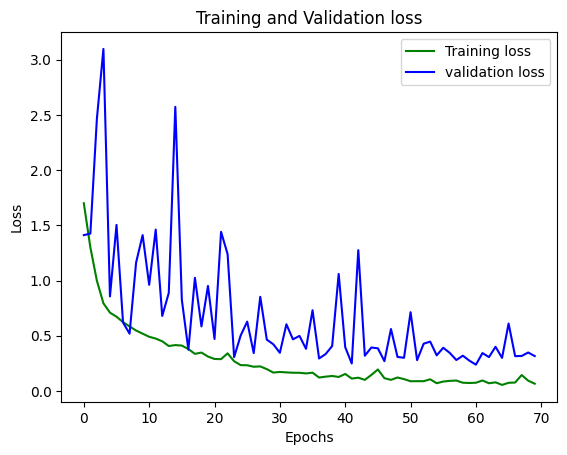

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,len(loss_train)) # Change here to get the correct number of epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#model.save('/content/drive/My Drive/FYP/alzheimer_detection.h5')

In [ ]:
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#Image path
# Check if the file exists
file_path = Path('/content/drive/My Drive/FYP/test/others/pic2.jpg')  # Updated path with correct folder name
if not file_path.is_file():
    raise FileNotFoundError(f"Image file not found at: {file_path}")

# Load the image if it exists
img = image.load_img(file_path, target_size=(176,176))  # Load image using the file_path
image_array = img_to_array(img) / 255.0
image_array = np.expand_dims(image_array, axis=0)

img_array = image_array.reshape((1, 176, 176, 3))

predictions = model.predict(image_array)

#print(predictions)
predicted_label = train_labels[np.argmax(predictions)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [ ]:
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Image path
file_path = Path('/content/drive/My Drive/FYP/test/others/pic2.jpg')  # Updated path with correct folder name and image

# Check if the file exists
if not file_path.is_file():
    raise FileNotFoundError(f"Image file not found at: {file_path}")

# Load the image if it exists
img = image.load_img(file_path, target_size=(176,176))
image_array = img_to_array(img) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Make predictions
predictions = model.predict(image_array)

# Get predicted class and probability
predicted_class_index = np.argmax(predictions)
predicted_class_probability = predictions[0][predicted_class_index]

# Map class index to class name
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
predicted_class_name = class_names[predicted_class_index]

print(f"Predicted Class: {predicted_class_name}")
print(f"Probability: {predicted_class_probability:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Class: Moderate_Demented
Probability: 1.0000
